In [127]:
import math
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, Adagrad, SGD

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
!pip install neupy

     |████████████████████████████████| 226 kB 4.1 MB/s 
     |████████████████████████████████| 92.7 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 367 kB 45.3 MB/s 
     |████████████████████████████████| 3.2 MB 16.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progre

In [138]:
!sudo pip install keras --upgrade 

In [128]:
from neupy import algorithms
from neupy.layers import Input, Tanh, Linear 

In [129]:
def elipse(a, b, t, x0, y0, k):
  x = a * math.cos(t) + x0
  y = b * math.sin(t) + y0
  return x, y, k

def parabole(p, t, x0, y0):
  x=t*t/(2*p)+x0
  y=t+y0
  return x, y, 2

In [130]:
X1 = []

for i in range(60):
  t = random.uniform(0, 2 * math.pi)
  X1.append(elipse(0.4, 0.4, t, -0.1, 0.15, 0))

for i in range(100):
  t = random.uniform(0, 2 * math.pi)
  X1.append(elipse(0.7, 0.7, t, 0, 0, 1))

for i in range(120):
  t = random.uniform(0, 2 * math.pi)
  X1.append(parabole(-1, t, 0.8, 0))

In [131]:
df = pd.DataFrame(X1, columns =['x', 'y', 'class'])

In [132]:
df = shuffle(df)

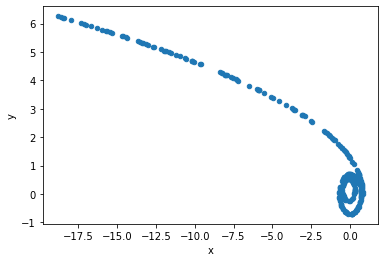

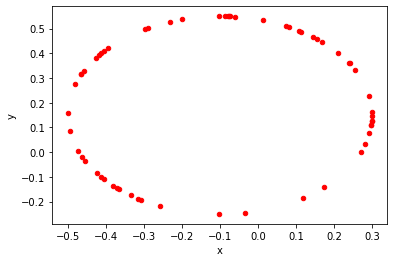

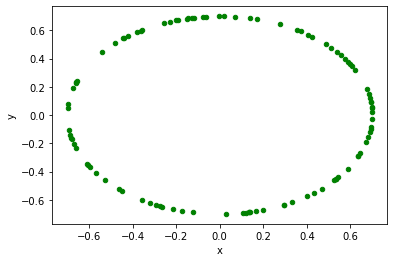

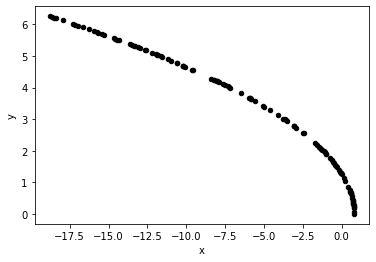

In [133]:
df.plot.scatter(x="x", y="y");
df[df['class'] == 0].plot.scatter(x="x", y="y", color = 'red');
df[df['class'] == 1].plot.scatter(x="x", y="y", color = 'green');
df[df['class'] == 2].plot.scatter(x="x", y="y", color = 'black');

In [134]:
y = np.array(pd.get_dummies(df['class']))

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df[['x', 'y']], y, test_size=0.3, random_state=42)

X_control, X_test, y_control, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [151]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(SGD(0.05, 0.9), 'categorical_crossentropy', metrics=['accuracy'])

In [141]:
X_control = X_control.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()

In [152]:
history = model.fit(X_train, y_train, epochs=1500, verbose=1, shuffle=True)

Epoch 1/1500
196/196 [==============================] - 0s 2ms/sample - loss: 0.9972 - acc: 0.3980
Epoch 2/1500
196/196 [==============================] - 0s 65us/sample - loss: 0.6990 - acc: 0.6429
Epoch 3/1500
196/196 [==============================] - 0s 73us/sample - loss: 0.6190 - acc: 0.7449
Epoch 4/1500
196/196 [==============================] - 0s 88us/sample - loss: 0.5817 - acc: 0.6939
Epoch 5/1500
196/196 [==============================] - 0s 105us/sample - loss: 0.5462 - acc: 0.7347
Epoch 6/1500
196/196 [==============================] - 0s 71us/sample - loss: 0.5297 - acc: 0.7398
Epoch 7/1500
196/196 [==============================] - 0s 76us/sample - loss: 0.5222 - acc: 0.7194
Epoch 8/1500
196/196 [==============================] - 0s 86us/sample - loss: 0.5101 - acc: 0.7602
Epoch 9/1500
196/196 [==============================] - 0s 98us/sample - loss: 0.5003 - acc: 0.7347
Epoch 10/1500
196/196 [==============================] - 0s 82us/sample - loss: 0.4986 - acc: 0.7296

In [153]:
pred = model.predict(X_train)
true_pred = []
true_y_train = []
for p in range(len(pred)):
  true_pred.append(np.argmax(pred[p]))
  true_y_train.append(np.argmax(y_train[p]))

In [154]:
print(accuracy_score(true_y_train, true_pred))

1.0


In [155]:
pred = model.predict(X_test)
true_pred = []
true_y_test = []
for p in range(len(pred)):
  true_pred.append(np.argmax(pred[p]))
  true_y_test.append(np.argmax(y_test[p]))

In [156]:
print(accuracy_score(true_y_test, true_pred))

1.0


In [157]:
pred = model.predict(X_control)
true_pred = []
true_y_control = []
for p in range(len(pred)):
  true_pred.append(np.argmax(pred[p]))
  true_y_control.append(np.argmax(y_control[p]))

In [158]:
print(accuracy_score(true_y_control, true_pred))

1.0


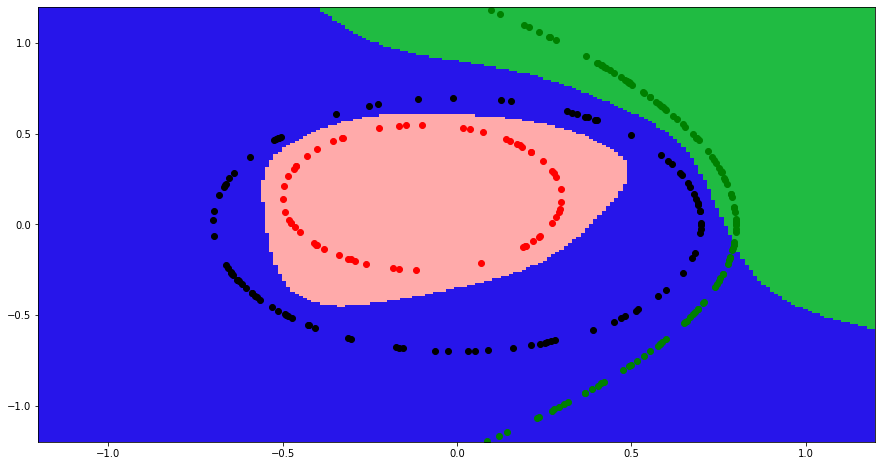

In [159]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))
eps = 0.1
xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 200),
                     np.linspace(-1.2, 1.2, 200))
F = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([])
s = model.predict(F)
ss = []
for p in s:
  ss.append(np.argmax(p))
Z = np.append(Z, ss)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#2715ea', '#20bb42'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

X1 = []
Y1 = []
for i in range(60):
  t = random.uniform(0, 2 * math.pi)
  x, y, k = elipse(0.4, 0.4, t, -0.1, 0.15, 0)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "red")

X1 = []
Y1 = []
for i in range(100):
  t = random.uniform(0, 2 * math.pi)
  x, y, k = elipse(0.7, 0.7, t, 0, 0, 1)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "black")

X1 = []
Y1 = []
for i in range(120):
  t = random.uniform(-1.2,1.2)
  x, y, k = parabole(-1, t, 0.8, 0)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "green")
plt.show()

In [160]:
#2 часть
def x_func(t):
  return np.sin(t * t - 10 * t + 3)

h = 0.025
tt = []
t = 1
YY = []
X = []
while t <= 6:
  tt.append(t)
  YY.append(round(x_func(t))) #целая часть числа
  X.append(x_func(t))
  t += h

In [161]:
X = np.array(tt)
Y = np.array(X)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [167]:
from sklearn.neural_network import MLPRegressor
r = MLPRegressor(learning_rate= 'adaptive', hidden_layer_sizes=(10,), learning_rate_init = 0.05, momentum = 0.9, max_iter = 600, solver = 'sgd', activation = 'logistic')

In [168]:
loss = r.fit(X_train.reshape(-1, 1), y_train)
r.score(X_train.reshape(-1, 1), y_train)

0.998544633782175

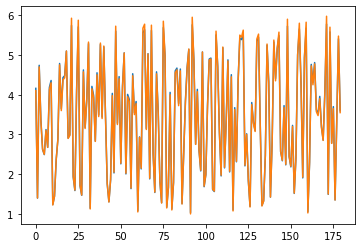

In [169]:
pred = r.predict(X_train.reshape(-1, 1))
plt.plot(pred)
plt.plot(y_train)

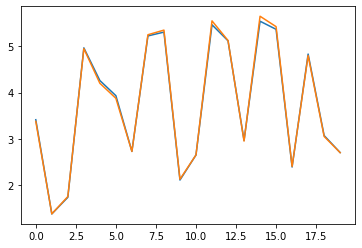

In [170]:
pred = r.predict(X_test.reshape(-1, 1))
plt.plot(pred)
plt.plot(y_test)

In [171]:
print(r.score(X_test.reshape(-1, 1), y_test))

0.9990673380317432


In [172]:
h = 0.025
t = np.linspace(1, 6, int(6/h), endpoint=True)
X = x_func(t)

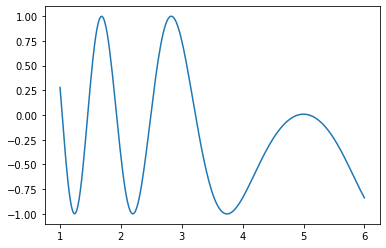

In [ ]:
#третья часть
plt.plot(t, X)

In [ ]:
model = algorithms.QuasiNewton(Input(1) >> Tanh(10) >> Linear(1), update_function='bfgs') #метод оптимизации функций многих переменных второго порядка

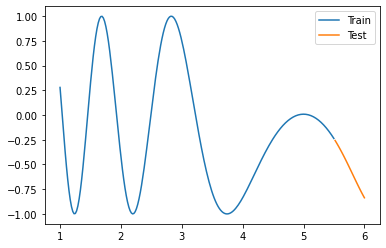

In [ ]:
train_size = int(len(t) * 0.9)

X_train = t[:train_size]
y_train = X[:train_size]
plt.plot(X_train, y_train, label='Train')

X_test = t[train_size:]
y_test = X[train_size:]

plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train, y_train, epochs=600)

QuasiNewton((?, 1) -> [... 3 layers ...] -> (?, 1), verbose=False, show_epoch=1, shuffle_data=False, signals=None, target=Tensor("placeholder/target/linear-31:0", shape=(?, 1), dtype=float32), regularizer=None, loss=mse, wolfe_maxiter=20, wolfe_c1=0.0001, wolfe_c2=0.9, update_function=bfgs, epsilon=1e-07, h0_scale=1)

RMSE = 0.04952622703828579
RMSE = 0.5857851500772907


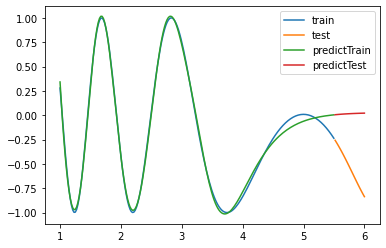

In [ ]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model.predict(X_train)
mse = sklearn.metrics.mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE = {np.sqrt(mse)}')


pred_x = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE = {np.sqrt(mse)}')
plt.legend()
plt.show()